In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from cluster_filter import cfilter, cassign

from External.ICT.calculate_ICT import calculate_ICT, calculate_sub_ICTs
from External.clustering import centers, k_means_pp
from External.generation import create_graph
from External.plotting import plot_points, plot_graph, no_intersections
from External.create_k_nearest import patch_together

plt.style.use('standard.mplstyle')

cv2 package not present. No movies possible


In [5]:
# Hyperparameters
mode = "K_Nearest"
metric = "euclidean"
dataset = "non_convex"
ICT_algorithm = "cluster_all"


min_cluster_size = 12
small_behavior = "reassign"

# image loading
n = number_of_nodes = 1000
Random = True
image_name = "image"

# for the filename
parameters = "2-0_5-1000"

In [6]:
def load_image(filename):
    a=plt.imread(filename+'.png')
    rgb_weights = [0.2989, 0.5870, 0.1140]
    
    grayscale_image = np.dot(a[...,:3], rgb_weights)>0
    
    return grayscale_image
    
    
def sample_points_from_image(n,img,Random=True):
    if not Random:
        random.seed(42)
    non_zero = np.where(img!=0)
    # non_zero=np.vstack((non_zero[0],non_zero[1])).T
    
    
    idx = random.sample(range(len(non_zero[0])),n)
    
    x_coord = non_zero[0][idx]
    y_coord = non_zero[1][idx]
    return x_coord,y_coord

In [7]:
# Compute the position array
img = load_image(image_name)
position = np.array(sample_points_from_image(n,img,Random)).T
position = StandardScaler().fit_transform(position)

# Compute knearest graph


# ε, δ = 0.03, 0.1
# r = 1 / (ε**2) * (int(np.log2(number_of_nodes - 1)) + 1 + np.log(1/δ))
# k = int(np.sqrt(r))
# k = np.min((k, number_of_nodes))


k = 3

cluster_centers, cluster_labels = k_means_pp(k, position, return_labels=True)

if small_behavior == "remove":
    cluster_centers, cluster_labels, (position, ) = cfilter(cluster_centers, cluster_labels, t=min_cluster_size, position_likes=[position])
    number_of_nodes = len(position)
if small_behavior == "reassign":
    cluster_centers, cluster_labels = cassign(cluster_centers, cluster_labels, position, t=min_cluster_size)
    
sub_ICTs, components = calculate_sub_ICTs(position, cluster_centers, cluster_labels, t=min_cluster_size)


# plot the ICT forest
ICT_forest = nk.graph.Graph(n=len(position), weighted=True)
distances = pairwise_distances(position, position)
for component, sub_ICT in zip(components, sub_ICTs):
    for u, v, w in sub_ICT.iterEdgesWeights():
        nodeA = component[u]
        nodeB = component[v]
        ICT_forest.addEdge(nodeA, nodeB, distances[nodeA, nodeB])
        
ICT_forest.indexEdges()

sklearn is done: 0.17256903648376465
My own part is done: 0.0005860328674316406


  0%|          | 0/3 [00:00<?, ?it/s]

Final k: 11


create edgeId array:   0%|          | 0/2440 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/2440 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/381 [00:00<?, ?it/s]

update Arr 2440 -> 2213
update Arr 2213 -> 1999
update Arr 1999 -> 1817
update Arr 1817 -> 1643
update Arr 1643 -> 1490
update Arr 1490 -> 1354
update Arr 1354 -> 1226
update Arr 1226 -> 1111
update Arr 1111 -> 1003
update Arr 1003 -> 909
update Arr 909 -> 824
update Arr 824 -> 749
update Arr 749 -> 673
update Arr 673 -> 607
update Arr 607 -> 543
update Arr 543 -> 489
update Arr 489 -> 444
update Arr 444 -> 400
update Arr 400 -> 391
update Arr 391 -> 387
update Arr 387 -> 383
update Arr 383 -> 382
update Arr 382 -> 381
Final k: 11


create edgeId array:   0%|          | 0/1868 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/1868 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/293 [00:00<?, ?it/s]

update Arr 1868 -> 1697
update Arr 1697 -> 1537
update Arr 1537 -> 1390
update Arr 1390 -> 1263
update Arr 1263 -> 1147
update Arr 1147 -> 1037
update Arr 1037 -> 940
update Arr 940 -> 852
update Arr 852 -> 773
update Arr 773 -> 693
update Arr 693 -> 628
update Arr 628 -> 570
update Arr 570 -> 515
update Arr 515 -> 463
update Arr 463 -> 417
update Arr 417 -> 376
update Arr 376 -> 341
update Arr 341 -> 308
update Arr 308 -> 303
update Arr 303 -> 300
update Arr 300 -> 295
update Arr 295 -> 295
update Arr 295 -> 294
Final k: 11


create edgeId array:   0%|          | 0/2055 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/2055 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/323 [00:00<?, ?it/s]

update Arr 2055 -> 1861
update Arr 1861 -> 1689
update Arr 1689 -> 1535
update Arr 1535 -> 1387
update Arr 1387 -> 1260
update Arr 1260 -> 1143
update Arr 1143 -> 1036
update Arr 1036 -> 938
update Arr 938 -> 851
update Arr 851 -> 767
update Arr 767 -> 694
update Arr 694 -> 628
update Arr 628 -> 567
update Arr 567 -> 513
update Arr 513 -> 463
update Arr 463 -> 415
update Arr 415 -> 371
update Arr 371 -> 337
update Arr 337 -> 332
update Arr 332 -> 329
update Arr 329 -> 326
update Arr 326 -> 324
update Arr 324 -> 323


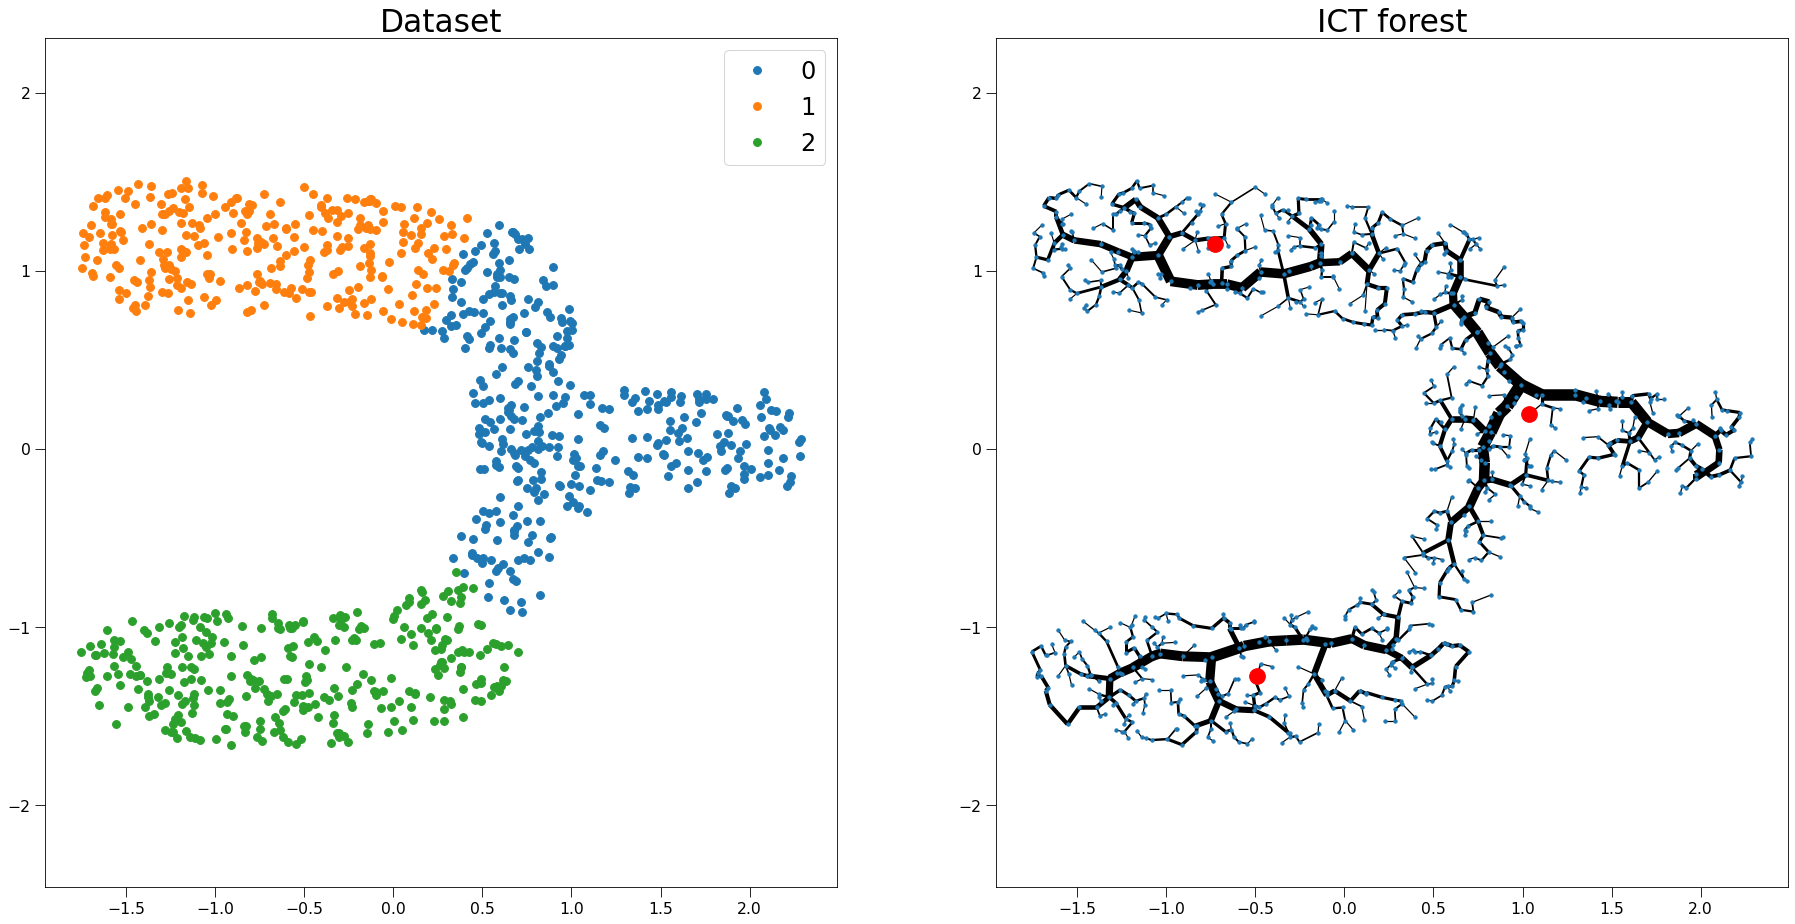

In [8]:
# Plot the prepared data
fig, axs = plt.subplots(1, 2)
plot_points(position, "Dataset", axs[0], labels=np.array(cluster_labels))
plot_graph(ICT_forest, position, "ICT forest", axs[1], cluster_centers)
plt.show()

In [9]:
G = patch_together(ICT_forest, position, bridges=4)

ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

Patching the components together:   0%|          | 0/3 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/1005 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/1005 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/999 [00:00<?, ?it/s]

update Arr 1005 -> 1004
added 303 edges early
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1004
update Arr 1004 -> 1003
update Arr 1003 -> 1003
update Arr 1003 -> 1003
update Arr 1003 -> 1003
update Arr 1003 -> 1003
update Arr 1003 -> 1003
update Arr 1003 -> 1003
update Arr 1003 -> 1003
update Arr 1003 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 ->

In [10]:
max_st = nk.graph.RandomMaximumSpanningForest(G)
max_st.run()
max_st = max_st.getMSF(True)
max_st.indexEdges()
G_inv = nk.graph.Graph(n=G.numberOfNodes(), weighted=True)
for u,v,w in G.iterEdgesWeights():
    G_inv.addEdge(u,v,1/w)

min_st = nk.graph.RandomMaximumSpanningForest(G_inv)
min_st.run()
min_st = min_st.getMSF(True)
min_st.indexEdges()

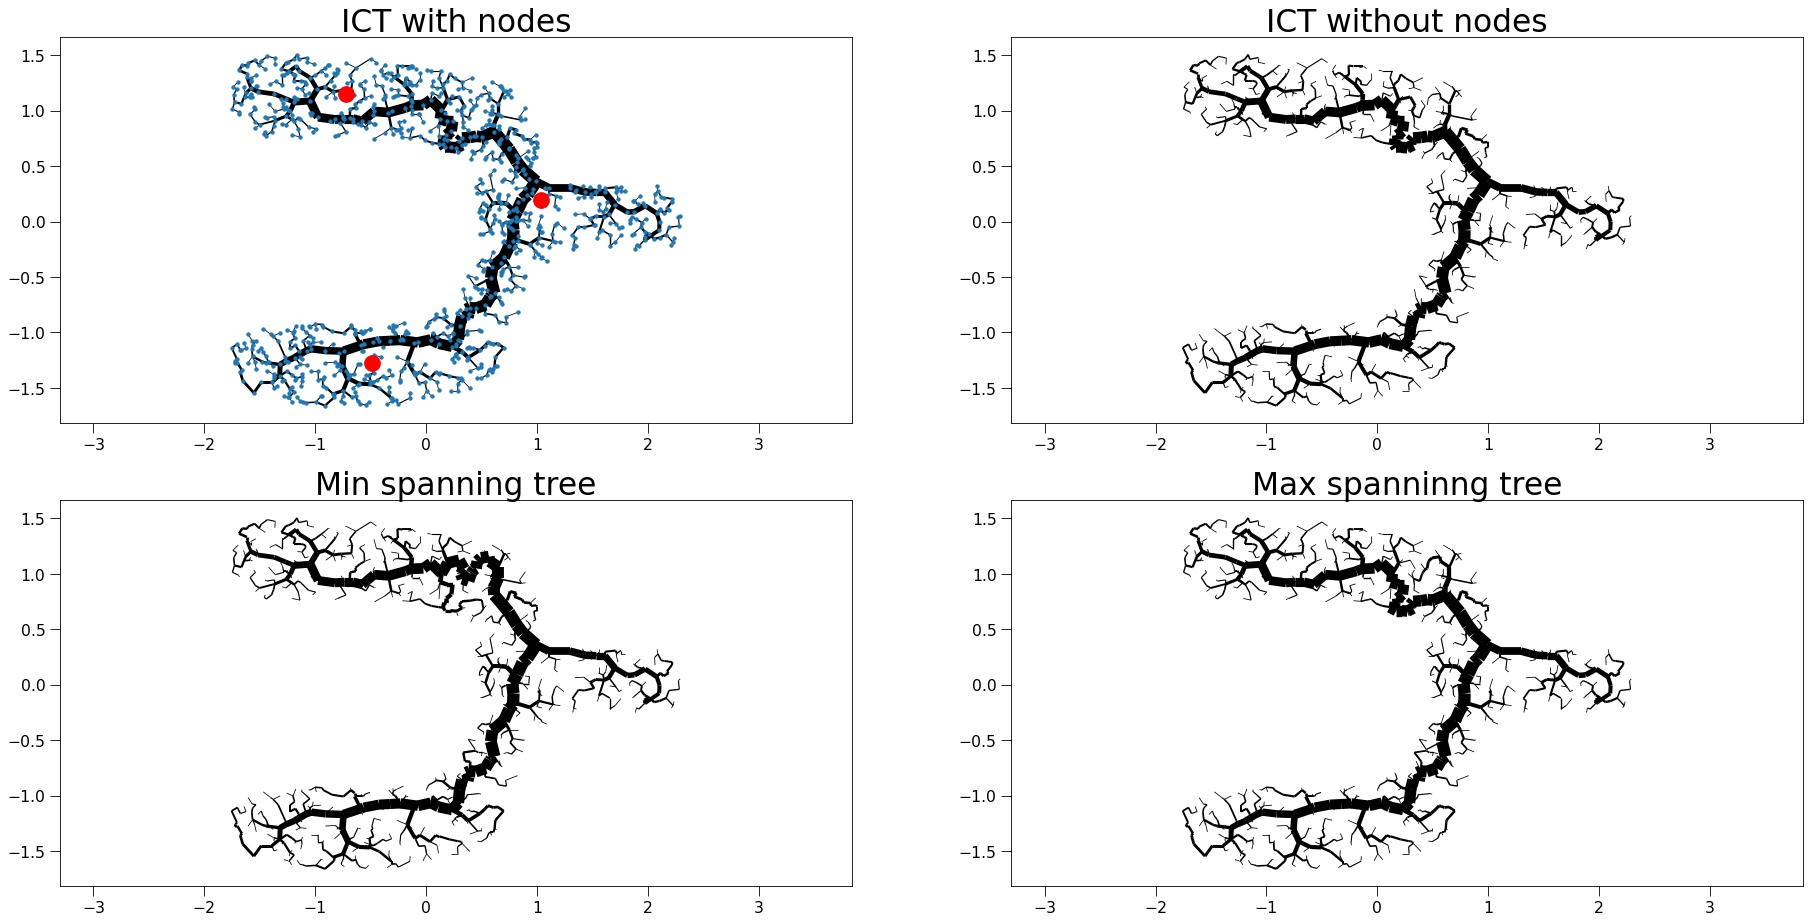

In [11]:
# Plot the ICT
fig, axs = plt.subplots(2, 2)
plot_graph(ICT, position, "ICT with nodes", axs[0,0], cluster_centers)
plot_graph(ICT, position, "ICT without nodes", axs[0,1], node_size=0)
plot_graph(max_st, position, "Max spanninng tree", axs[1,1], node_size=0)
plot_graph(min_st, position, "Min spanning tree", axs[1,0], node_size=0)
# plt.savefig(dataset+"-"+parameters+".png")